# R1-6 rhabdom morphology and synaptic connectivity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
import statsmodels.api as sm

from cx_analysis.vis.hex_lattice import hexplot
from cx_analysis.vis.fig_tools import linear_cmap, subtype_cm

import matplotlib as mpl
#mpl.rc('font', size=14)

In [2]:
st_cm = subtype_cm()
plt.style.use('cx_analysis/vis/lamina.mplstyle') # May not work if installed as a module
### SAVE FIGS? ###
save_figs = False
fig_path = '/mnt/home/nchua/Dropbox/lamina_figures/210709/'
# if save_figs:
#     fig.savefig(fig_path + 'R7R8_inputs.svg')
#     fig.savefig(fig_path + 'R7R8_inputs.png')
##################

In [3]:
tp = '210615'
lamina_links = pd.read_pickle(f'~/Data/{tp}_lamina/{tp}_linkdf.pickle')

subtypes = np.unique([*lamina_links["pre_type"], *lamina_links["post_type"]])
all_ctypes = [p for p in itertools.product(subtypes, subtypes)]  
all_ctype_labels = [f"{pre}->{post}" for pre, post in all_ctypes]
om_list = ommatidia = np.unique(lamina_links['pre_om'])

df_lamina = pd.DataFrame(index=om_list, columns=all_ctype_labels)
for om, row in df_lamina.iterrows():
    for c in all_ctype_labels:
        pre_t, post_t = c.split('->')
        # Cartridges on the posterior edge lack L4, so their counts for these connections are NaNed 
        if om in ['B0', 'E4', 'E5', 'E6', 'E7', 'D2'] and post_t == 'LMC_4':
            df_lamina.loc[om, c] = np.nan
        else:
            df_lamina.loc[om, c] = sum((lamina_links.pre_om == om) & (lamina_links.post_om == om) & 
                                       (lamina_links.pre_type == pre_t) & (lamina_links.post_type == post_t))

In [4]:
svfs = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']
all_vfs = [*svfs, 'R7', 'R8', 'R7p']
lmcs = ['LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'LMC_N']

In [5]:
#df_presites = pd.DataFrame(index=om_list, columns=all_vfs)
#df_outputs = pd.DataFrame(index=om_list, columns=all_vfs)

# long form dataframe with multiindex (om x svf subtype) might be easier to use
long = pd.DataFrame(index=pd.MultiIndex.from_product([om_list, all_vfs], names=['om', 'subtype']))

# Uses neuron name to query list of connections since pretype combines svfs pairs
for om in om_list:
    for s in all_vfs:
        neuron_name = f"om{om}_{s}"
        if om == 'C2':
            neuron_name += '_nc'
            
        links = lamina_links.loc[lamina_links['pre_neuron'] == neuron_name]
        lmc_links = links.loc[[i for i, v in links['post_type'].items() if v[0:3] == 'LMC']]
        c_ids = links['cx_id'].unique()
#         df_presites.loc[om, s] = len(c_ids)
#         df_outputs.loc[om, s] = len(links)
        
        long.loc[(om, s), 'presites'] = len(c_ids)
        long.loc[(om, s), 'syn'] = len(links)
        long.loc[(om, s), 'lmc_syn'] = len(lmc_links)
        for l in lmcs:
            long.loc[(om, s), f'->{l}'] = len(links.loc[[i for i, v in links['post_type'].items() if v == l]])
        if len(links) > 0 and s in svfs:
            long.loc[(om, s), 'syn_multi'] = len(links)/len(c_ids)
        elif len(links) > 0 and s not in svfs:
            long.loc[(om, s), 'syn_multi'] = len(links)/len(c_ids)
            display('Long photoreceptor has more than zero connections in the lamina. Check if this is real')
            #display(links)
        else:
            # When links are 0 (lvfs), multiplicity is NaN
            long.loc[(om, s), 'syn_multi'] = np.nan

'Long photoreceptor has more than zero connections in the lamina. Check if this is real'

link_id   cx_id pre_neuron pre_om pre_type pre_skel post_neuron post_om  \
13364  228363  328663   omB0_R7p     B0      R7p   216709     omB0_R5      B0   
13365  228356  328663   omB0_R7p     B0      R7p   216709     omB0_L3      B0   
13366  228351  328663   omB0_R7p     B0      R7p   216709     omB0_L1      B0   
13367  228350  328663   omB0_R7p     B0      R7p   216709     omB0_L3      B0   
13368  228349  328663   omB0_R7p     B0      R7p   216709     omB0_R8      B0   
13369  228348  328663   omB0_R7p     B0      R7p   216709     omB0_L2      B0   
13370  228347  328663   omB0_R7p     B0      R7p   216709    omB0_R7p      B0   

      post_type post_skel  
13364      R2R5    214441  
13365     LMC_3    216748  
13366     LMC_1    216758  
13367     LMC_3    216748  
13368        R8    167684  
13369     LMC_2    216753  
13370       R7p    216709

'Long photoreceptor has more than zero connections in the lamina. Check if this is real'

link_id   cx_id pre_neuron pre_om pre_type pre_skel post_neuron post_om  \
9285  272363  423249    omB5_R8     B5       R8   165923     omB5_R7      B5   
9286  272362  423249    omB5_R8     B5       R8   165923    omB5_R7p      B5   

     post_type post_skel  
9285        R7    241264  
9286       R7p    241249

'Long photoreceptor has more than zero connections in the lamina. Check if this is real'

link_id   cx_id pre_neuron pre_om pre_type pre_skel post_neuron post_om  \
6647  153663  248469    omD5_R8     D5       R8   143980     omD5_R7      D5   
6648  153649  248469    omD5_R8     D5       R8   143980     omD5_L1      D5   
6649  153650  248469    omD5_R8     D5       R8   143980      omD5_C      D5   

     post_type post_skel  
6647        R7     14191  
6648     LMC_1    143917  
6649    centri    145113

In [6]:
# To retrive the indices of groups of subtypes in the longform df
r1r4r3r6_ind = (slice(None),['R1', 'R3', 'R4', 'R6'])
r2r5_ind = (slice(None),['R2', 'R5'])

In [7]:
# Volume data from excel provided by AM. 
# Contains both the volume of each PR's cell body, and the volume of just their rhabdomeres
xl_dir = '~/Data/cell_rbd_volume.xlsx'
full_df = pd.read_excel(xl_dir, header=[0, 1], index_col=0, nrows=9)

# Each om has two columns: cell body and rhabdomere vol 
rbd = dict.fromkeys(full_df.columns.levels[0])
soma = dict.fromkeys(full_df.columns.levels[0])

for om in full_df.columns.levels[0]:
    rbd[om] = full_df.loc[:, (om, 'rbd')]
    soma[om] = full_df.loc[:, (om, 'cell body')]
    
vol_df = pd.DataFrame(rbd)
# E5 was damaged in our specimen so Anastasia took measurements from an E5 in a different wasp
vol_df = vol_df.rename(mapper={"R7'": "R7p"}, axis=0).rename(mapper={"E5*": "E5"}, axis=1).T
soma_df = pd.DataFrame(soma)
soma_df = soma_df.rename(mapper={"R7'": "R7p"}, axis=0).rename(mapper={"E5*": "E5"}, axis=1).T
# append this to the long form dataframe
for om, row in vol_df.iterrows():
    total = row.sum()
    for s, v in row.items():
        long.loc[(om, s), 'rbd_vol'] = v
        long.loc[(om, s), 'rbd_frac'] = v/total
        long.loc[(om, s), 'soma_vol'] = soma_df.loc[om, s]
        
assert(len(long) == 29 * 9) # check that all PRs are there

<ipython-input-7-612d9f042acd>:4: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  full_df = pd.read_excel(xl_dir, header=[0, 1], index_col=0, nrows=9)


## Mean and variance of individual R1-6

In [8]:
display('Average across ommatidia', long.groupby('subtype').mean().round(decimals=1))
display('Standard deviation', long.groupby('subtype').std().round(decimals=1))

'Average across ommatidia'

presites    syn  lmc_syn  ->LMC_1  ->LMC_2  ->LMC_3  ->LMC_4  \
subtype                                                                 
R1            9.0   70.0     53.9     18.5     22.8      8.9      3.4   
R2           12.7  105.3     73.4     18.0     27.1     18.7      9.4   
R3            8.9   72.8     56.6     17.3     22.8     11.3      4.4   
R4            8.8   71.8     55.1     17.4     23.0     10.4      3.6   
R5           12.6  103.6     73.5     17.1     26.9     18.7     10.2   
R6            8.8   66.5     51.5     16.0     21.4      9.2      4.1   
R7            0.0    0.0      0.0      0.0      0.0      0.0      0.0   
R7p           0.0    0.2      0.1      0.0      0.0      0.1      0.0   
R8            0.1    0.2      0.0      0.0      0.0      0.0      0.0   

         ->LMC_N  syn_multi  rbd_vol  rbd_frac  soma_vol  
subtype                                                   
R1           0.3        7.8      3.3       0.1      19.7  
R2           0.2        8.4      4.8       0.1      27.6  
R3           0.8        8.2      2.9       0.1      20.6  
R4           0.8        8.2      3.0       0.1      20.8  
R5           0.6        8.3      5.0       0.1      29.0  
R6           0.8        7.6      2.7       0.1      19.5  
R7           0.0        NaN      5.0       0.1      31.1  
R7p          0.0        7.0      9.7       0.2      46.2  
R8           0.0        2.5      4.7       0.1      23.7

'Standard deviation'

presites   syn  lmc_syn  ->LMC_1  ->LMC_2  ->LMC_3  ->LMC_4  ->LMC_N  \
subtype                                                                         
R1            1.5  18.1     12.7      6.3      5.0      5.2      2.3      0.9   
R2            1.4  11.9      9.2      3.2      5.2      4.3      3.9      0.8   
R3            1.8  17.2     13.7      6.0      5.4      6.0      3.7      1.1   
R4            1.4  15.6     11.9      5.3      7.2      3.9      3.4      1.2   
R5            1.7  13.2     11.3      4.3      5.8      4.6      4.7      1.2   
R6            1.6  12.5     10.2      5.0      4.7      3.9      3.3      1.5   
R7            0.0   0.0      0.0      0.0      0.0      0.0      0.0      0.0   
R7p           0.2   1.3      0.7      0.2      0.2      0.4      0.0      0.0   
R8            0.3   0.7      0.2      0.2      0.0      0.0      0.0      0.0   

         syn_multi  rbd_vol  rbd_frac  soma_vol  
subtype                                          
R1             1.4      1.7       0.0       3.3  
R2             0.9      1.7       0.0       4.2  
R3             1.2      0.9       0.0       3.2  
R4             1.3      1.4       0.0       3.8  
R5             0.9      1.6       0.0       4.5  
R6             1.4      1.0       0.0       3.9  
R7             NaN      1.9       0.1       7.4  
R7p            NaN      5.3       0.1      13.3  
R8             0.7      3.1       0.0       6.7

## Compare R2/R5 with (R1/R4, R3/6)

presites         syn    lmc_syn    ->LMC_1  \
class          statistic                                                
R2, R5         Mean       12.603448  104.465517  73.448276  17.586207   
               SD          1.530603   12.387724  10.089551   3.760202   
R1, R3, R4, R6 Mean         8.87069   70.267241  54.275862  17.301724   
               SD          1.556578    15.88176  12.137564   5.625097   

                            ->LMC_2    ->LMC_3   ->LMC_4   ->LMC_N syn_multi  \
class          statistic                                                       
R2, R5         Mean       26.982759  18.672414  9.793103  0.413793  8.333545   
               SD           5.41865   4.376221  4.257888  1.051017  0.856174   
R1, R3, R4, R6 Mean       22.482759   9.922414   3.87069  0.698276  7.953734   
               SD          5.577793   4.822989  3.190855  1.205017  1.311501   

                           rbd_vol  rbd_frac   soma_vol  
class          statistic                                 
R2, R5         Mean       4.859906  0.123055  28.333655  
               SD         1.584283  0.020637   4.313586  
R1, R3, R4, R6 Mean        2.96247   0.07357  20.164595  
               SD         1.308082  0.019198   3.525636

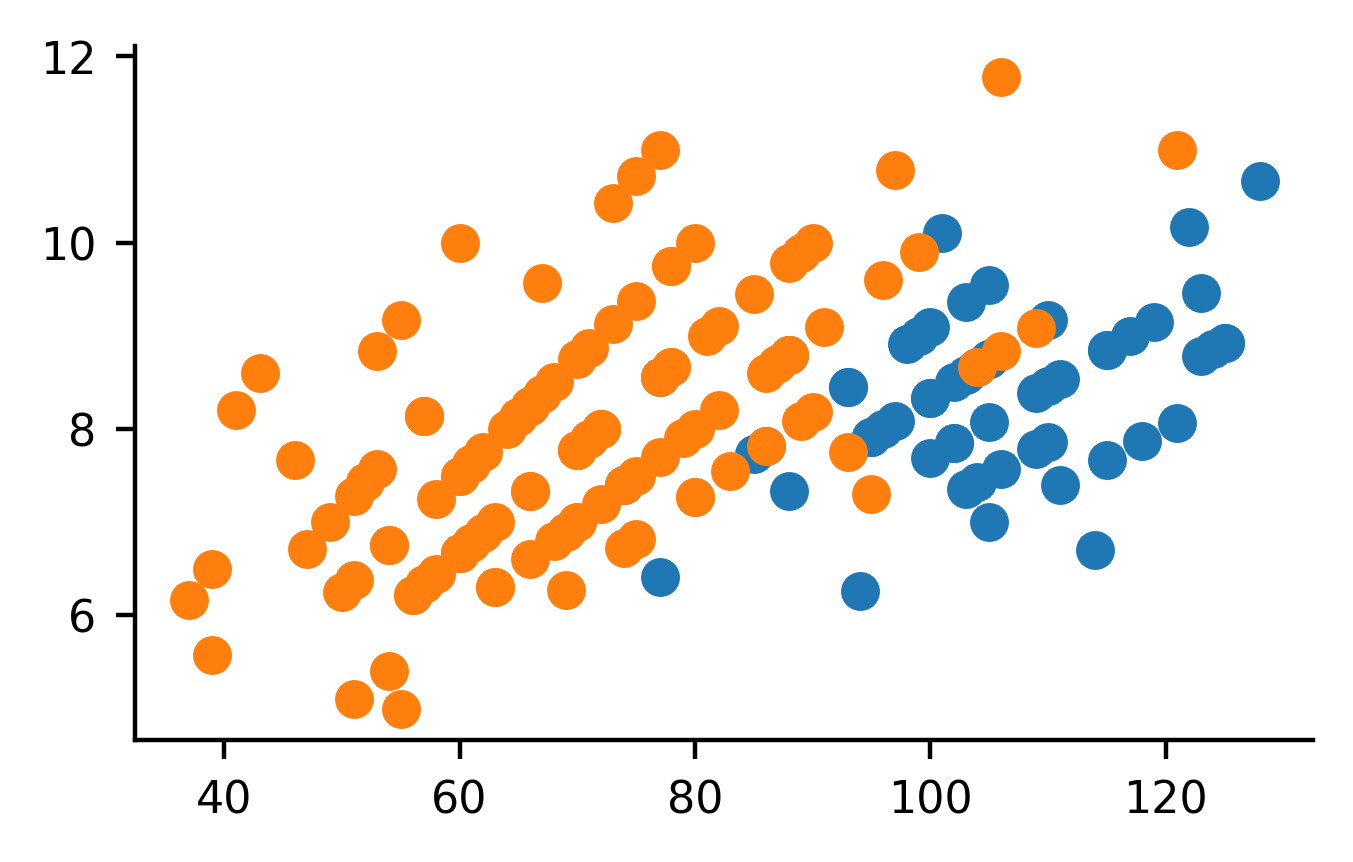

In [16]:
svf_comp =  pd.DataFrame(index=pd.MultiIndex.from_product([['R2, R5', 'R1, R3, R4, R6'], ['Mean', 'SD']],  
                                                          names=['class', 'statistic']), columns=long.columns)
svf_comp.loc[('R2, R5', 'Mean'), :] =  long.loc[r2r5_ind, :].mean()
svf_comp.loc[('R2, R5', 'SD'), :] =  long.loc[r2r5_ind, :].std(ddof=0)
svf_comp.loc[('R1, R3, R4, R6', 'Mean'), :] =  long.loc[r1r4r3r6_ind, :].mean()
svf_comp.loc[('R1, R3, R4, R6', 'SD'), :] =  long.loc[r1r4r3r6_ind, :].std(ddof=0)

display(svf_comp.round(decimals=1))

fig, ax = plt.subplots()
ax.scatter(x=long.loc[r2r5_ind, 'syn'], y=long.loc[r2r5_ind, 'syn_multi'])
ax.scatter(x=long.loc[r1r4r3r6_ind, 'syn'], y=long.loc[r1r4r3r6_ind, 'syn_multi'])

# display(long.loc[r1r4r3r6_ind, :].mean())
# display(long.loc[r2r5_ind, :].mean())
# display(long.loc[r1r4r3r6_ind, :].std())
# display(long.loc[r2r5_ind, :].std())
# display(long.loc[r1r4r3r6_ind, :].mean() / long.loc[r2r5_ind, :].mean())
# display(long.loc[r2r5_ind, :].mean() / long.loc[r1r4r3r6_ind, :].mean())

## Ratio of these measures between classes
mean(mean(R2, R5) / mean(R1, R4, R3, R6))

In [11]:
om_ratio = dict()
for om, rows in long.groupby('om'):
    #om_ratio.update({om: 1-(rows.loc[r1r4r3r6_ind, :].mean()/rows.loc[r2r5_ind, :].mean())})
    om_ratio.update({om: rows.loc[r2r5_ind, :].mean() / rows.loc[r1r4r3r6_ind, :].mean()})
    #om_ratio.update({om: (rows.loc[r2r5_ind, :].mean() - rows.loc[r1r4r3r6_ind, :].mean()) / rows.loc[r1r4r3r6_ind, :].mean()})
ratio_df = pd.DataFrame(om_ratio).T

for var, x in ratio_df.mean().items():
    display(f'R2/R5 receptors have {x: .2f} +/- {ratio_df[var].std(ddof=0): .2f}' +
            f'x the {var} of R1/R4 or R3/6 receptors')
# display(ratio_df.mean())
# display(ratio_df.std())

'R2/R5 receptors have  1.44 +/-  0.17x the presites of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.52 +/-  0.24x the syn of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.39 +/-  0.28x the lmc_syn of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.06 +/-  0.22x the ->LMC_1 of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.23 +/-  0.31x the ->LMC_2 of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  2.08 +/-  0.75x the ->LMC_3 of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  3.66 +/-  2.67x the ->LMC_4 of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  inf +/-  nanx the ->LMC_N of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.06 +/-  0.12x the syn_multi of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.71 +/-  0.33x the rbd_vol of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.71 +/-  0.33x the rbd_frac of R1/R4 or R3/6 receptors'

'R2/R5 receptors have  1.41 +/-  0.13x the soma_vol of R1/R4 or R3/6 receptors'

## Correlation of rhabdomere measurements with number of lamina outputs

### All R1-6

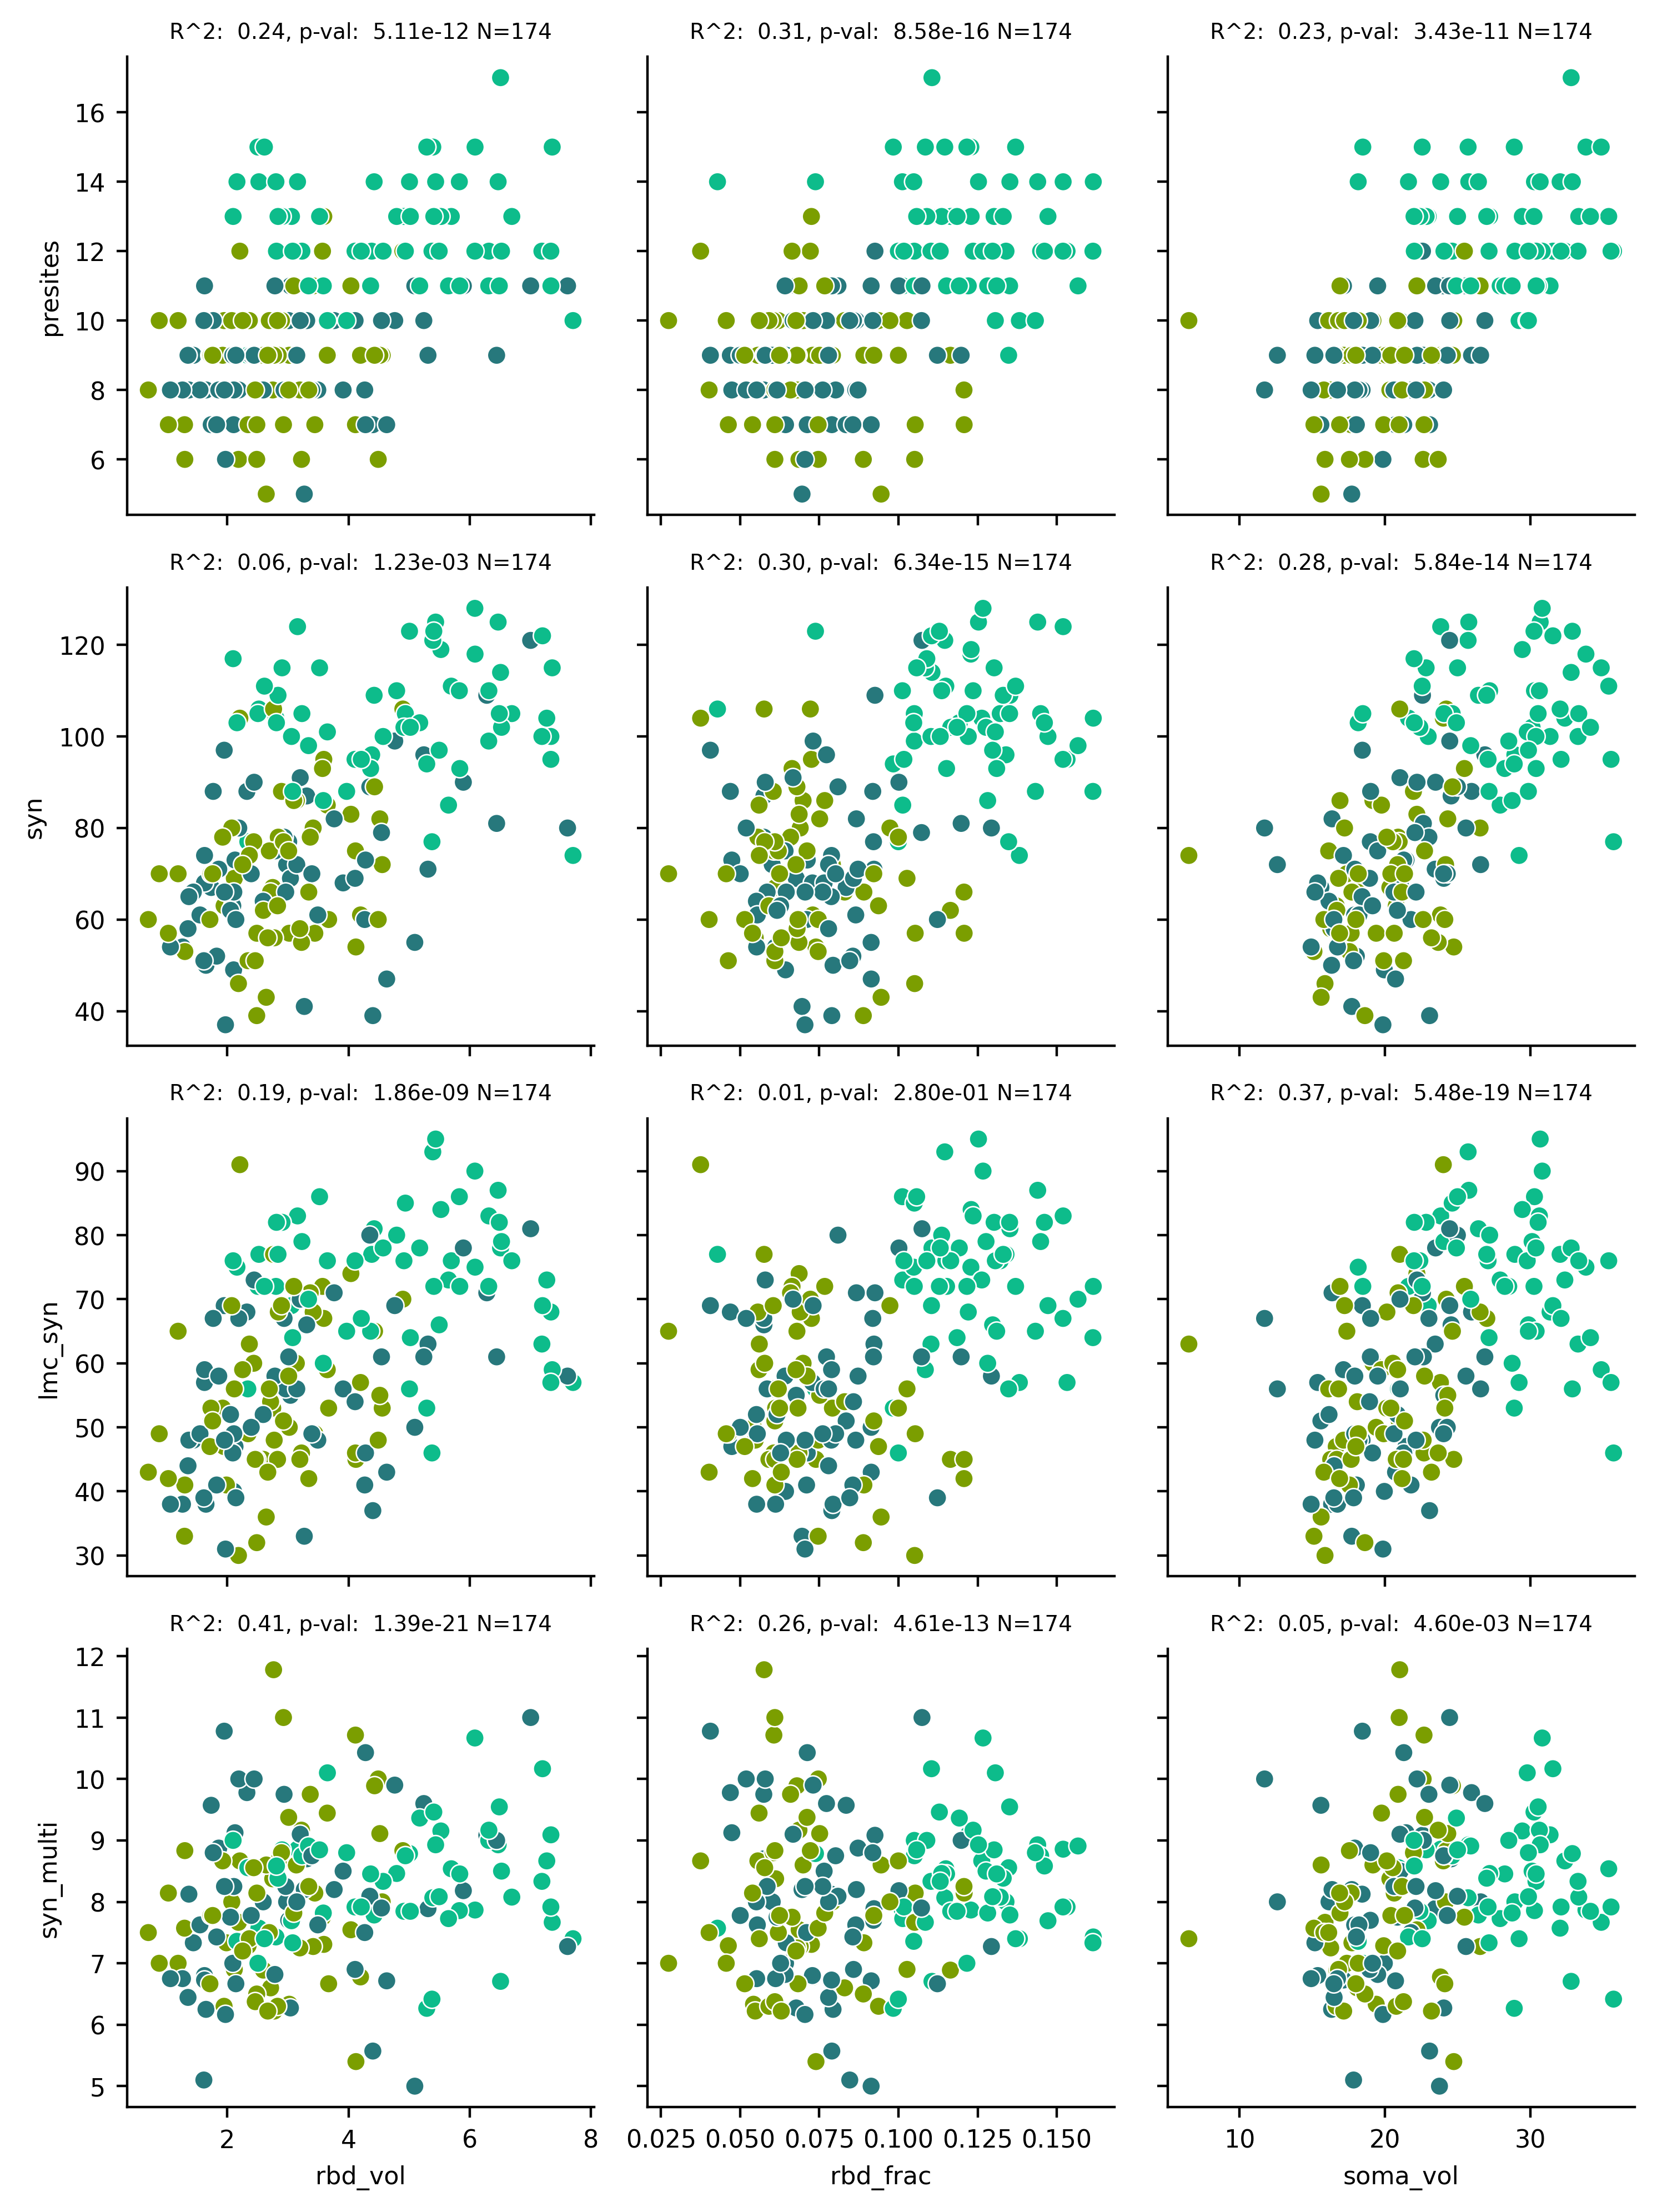

In [17]:
x_vars = ['rbd_vol', 'rbd_frac', 'soma_vol']
y_vars = ['presites', 'syn', 'lmc_syn', 'syn_multi']

incl_sts = svfs

data = long[long.index.get_level_values(1).isin(incl_sts)].reset_index()

g = sns.PairGrid(data, x_vars=x_vars, y_vars=y_vars, hue='subtype', palette=st_cm)
#g.map(sns.regplot)
g.map(sns.scatterplot)

res_table = pd.DataFrame(index=pd.MultiIndex.from_product([x_vars, y_vars]), columns=['R-squared', 'p-value'])

i = 0
axes = g.axes.flatten()

for this_x, this_y in itertools.product(x_vars, y_vars):
    X = sm.add_constant(data[this_x])
    Y = data[this_y]

    model = sm.OLS(Y, X)
    results = model.fit()
    res_table.loc[(this_x, this_y), 'R-squared'] = results.rsquared
    res_table.loc[(this_x, this_y), 'p-value'] = results.f_pvalue
    
    axes[i].set_title(f"R^2: {results.rsquared: .2f}, p-val: {results.f_pvalue: .2e} " +  
                      f"N={len(X)}", fontsize=7)
    i+=1

plt.tight_layout()
plt.show()

# if save_figs:
#     g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outvars.svg')
#     g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outvars.png')

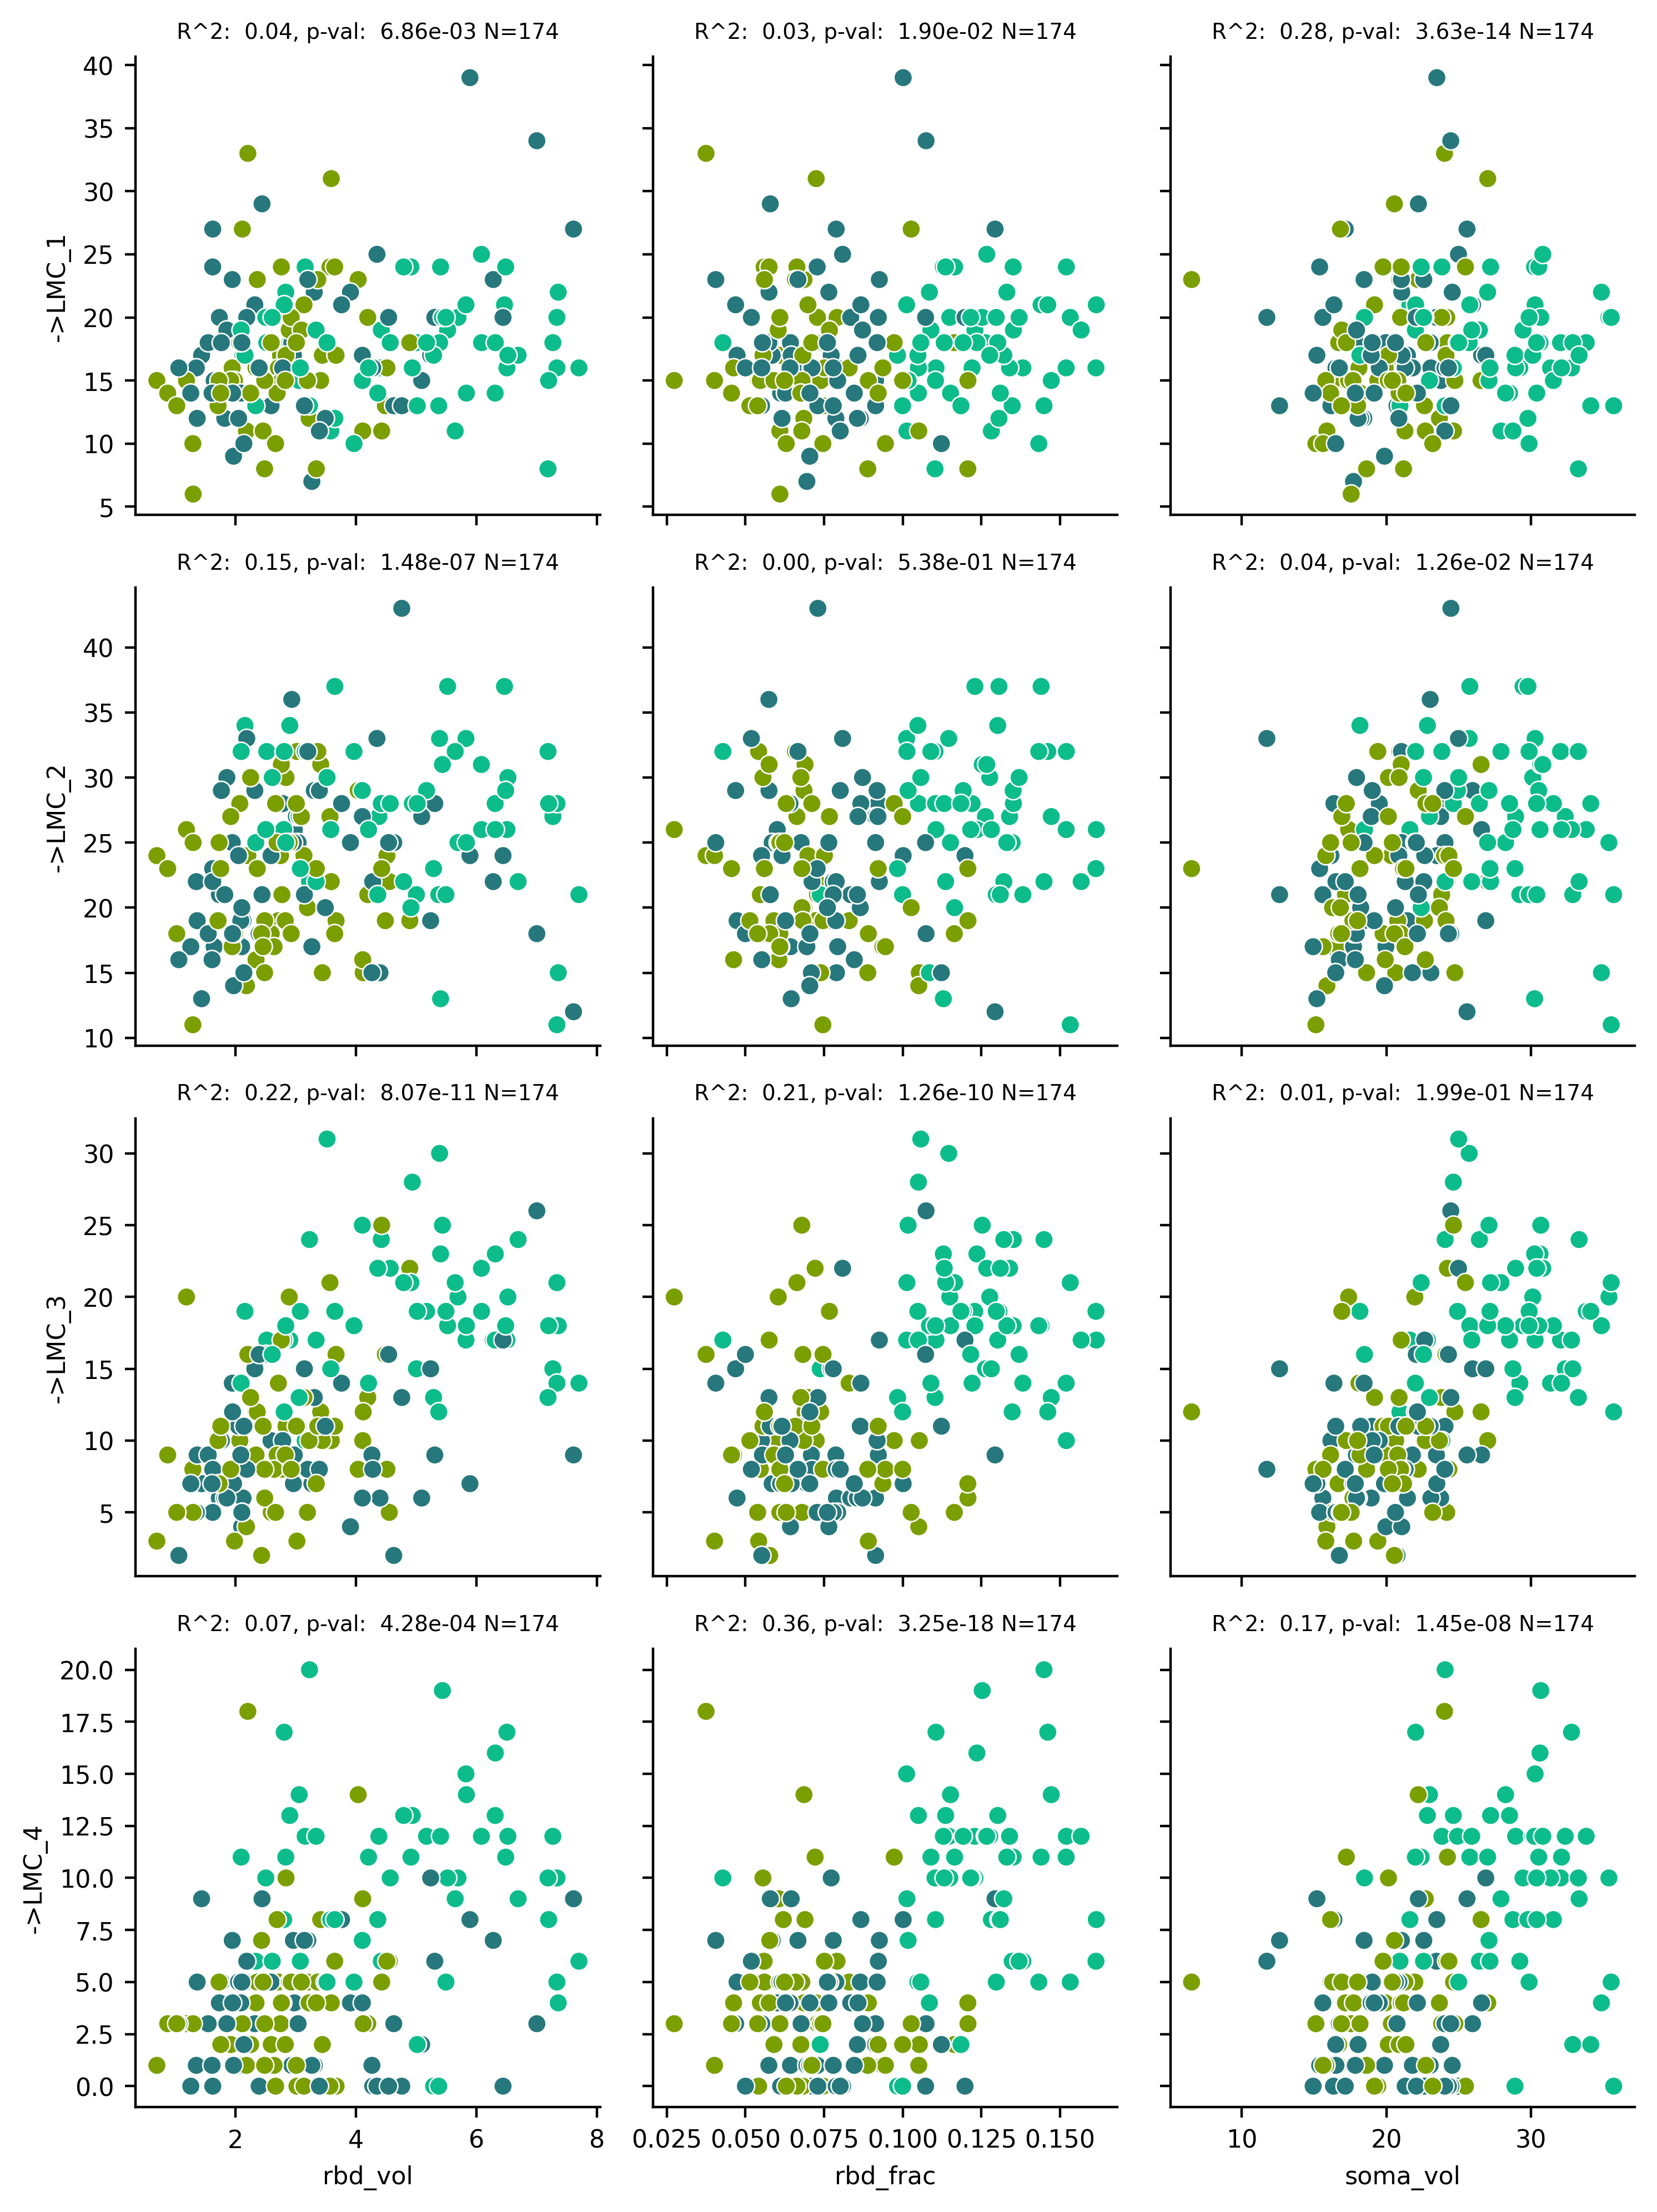

In [18]:
x_vars = ['rbd_vol', 'rbd_frac', 'soma_vol']
y_vars = ['->LMC_1', '->LMC_2', '->LMC_3', '->LMC_4']

incl_sts = svfs

data = long[long.index.get_level_values(1).isin(incl_sts)].reset_index()

g = sns.PairGrid(data, x_vars=x_vars, y_vars=y_vars, hue='subtype', palette=st_cm)
g.map(sns.scatterplot)

y_names = ["R1-6" + y for y in y_vars]
res_table = pd.DataFrame(index=pd.MultiIndex.from_product([x_vars, y_vars]), columns=['R-squared', 'p-value'])

i = 0
axes = g.axes.flatten()

for this_x, this_y in itertools.product(x_vars, y_vars):
    X = sm.add_constant(data[this_x])
    Y = data[this_y]

    model = sm.OLS(Y, X)
    results = model.fit()
    res_table.loc[(this_x, this_y), 'R-squared'] = results.rsquared
    res_table.loc[(this_x, this_y), 'p-value'] = results.f_pvalue
    
    axes[i].set_title(f"R^2: {results.rsquared: .2f}, p-val: {results.f_pvalue: .2e} " +  
                      f"N={len(X)}", fontsize=7)
    i+=1

#g.add_legend()
plt.tight_layout()
plt.show()
#display(res_table)

# if save_figs:
#     g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outL1-4.svg')
#     g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outL1-4.png')

## Are these correlations present *within* SVF classes?  

### R1, R4, R3, and R6

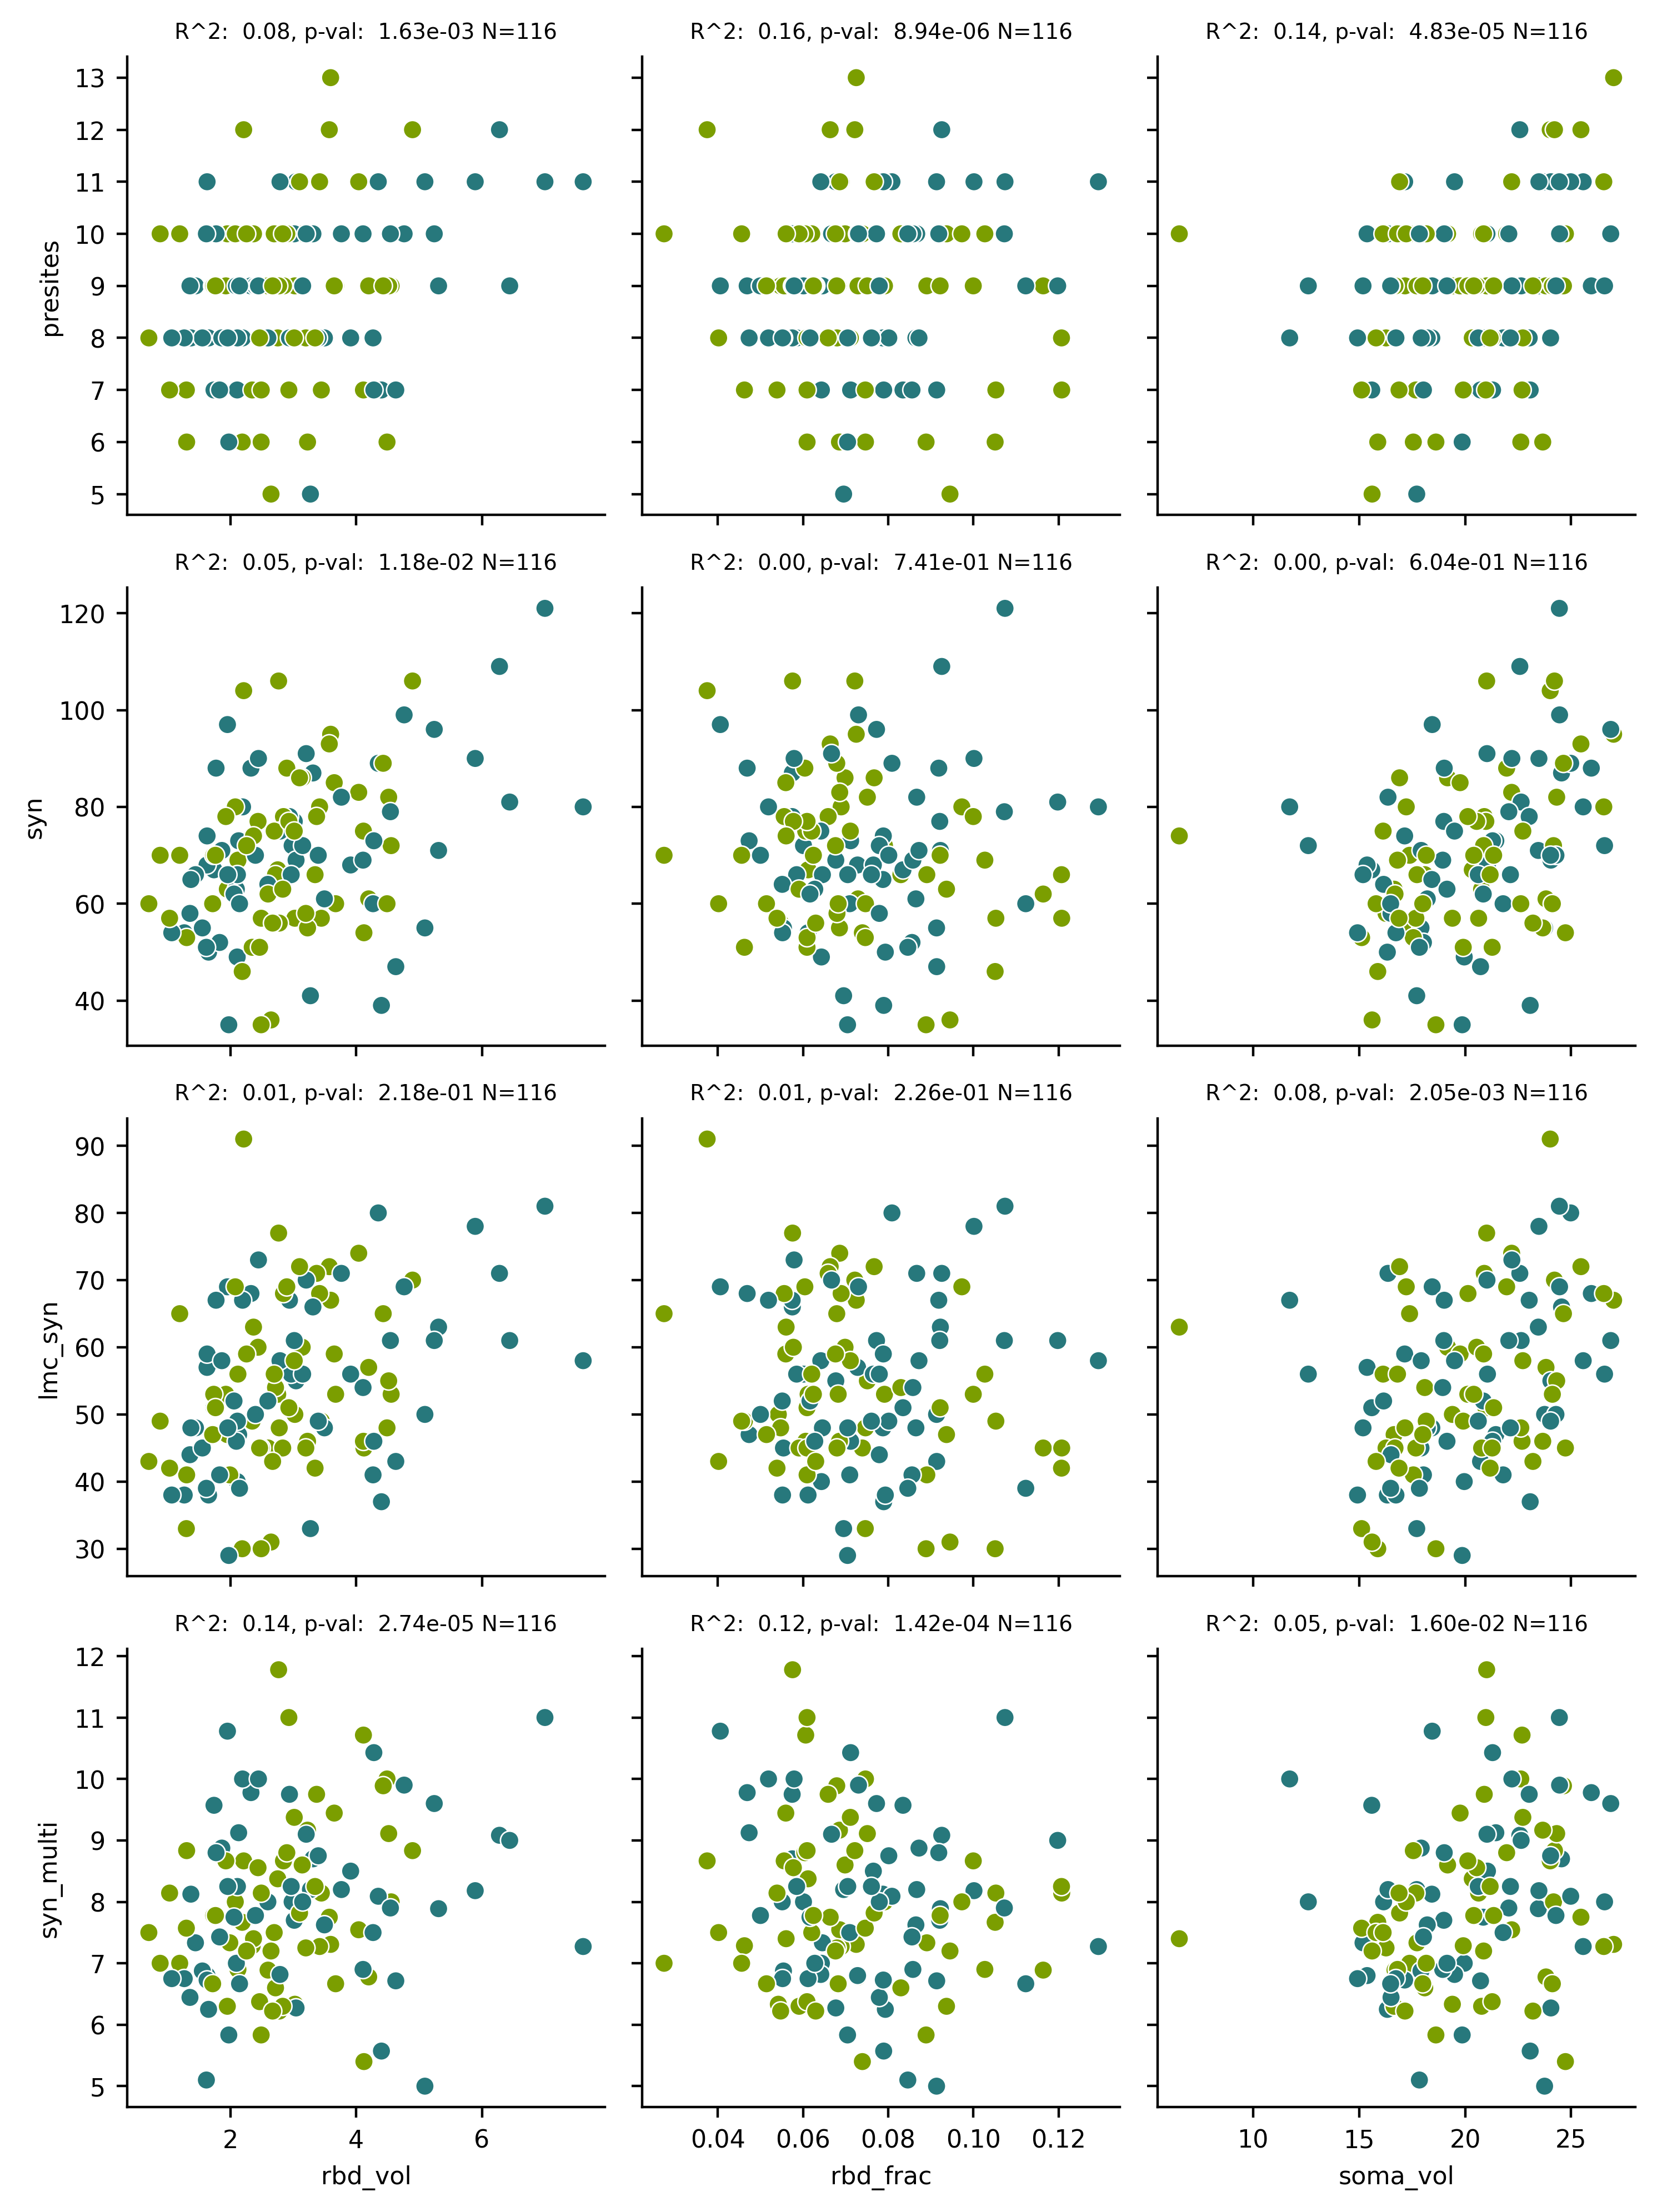

In [14]:
x_vars = ['rbd_vol', 'rbd_frac', 'soma_vol']
y_vars = ['presites', 'syn', 'lmc_syn', 'syn_multi']

incl_sts = ['R1', 'R4', 'R3', 'R6']

data = long[long.index.get_level_values(1).isin(incl_sts)].reset_index()

g = sns.PairGrid(data, x_vars=x_vars, y_vars=y_vars, hue='subtype', palette=st_cm)
g.map(sns.scatterplot)

i = 0
axes = g.axes.flatten()

res_table = pd.DataFrame(index=pd.MultiIndex.from_product([x_vars, y_vars]), columns=['R-squared', 'p-value'])

for this_x, this_y in itertools.product(x_vars, y_vars):
    X = sm.add_constant(data[this_x])
    Y = data[this_y]

    model = sm.OLS(Y, X)
    results = model.fit()
    res_table.loc[(this_x, this_y), 'R-squared'] = results.rsquared
    res_table.loc[(this_x, this_y), 'p-value'] = results.f_pvalue
    
    axes[i].set_title(f"R^2: {results.rsquared: .2f}, p-val: {results.f_pvalue: .2e} " +  
                      f"N={len(X)}", fontsize=7)
    i+=1

#g.add_legend()
plt.tight_layout()
plt.show()
#display(res_table)

if save_figs:
    g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outL1-4.svg')
    g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outL1-4.png')

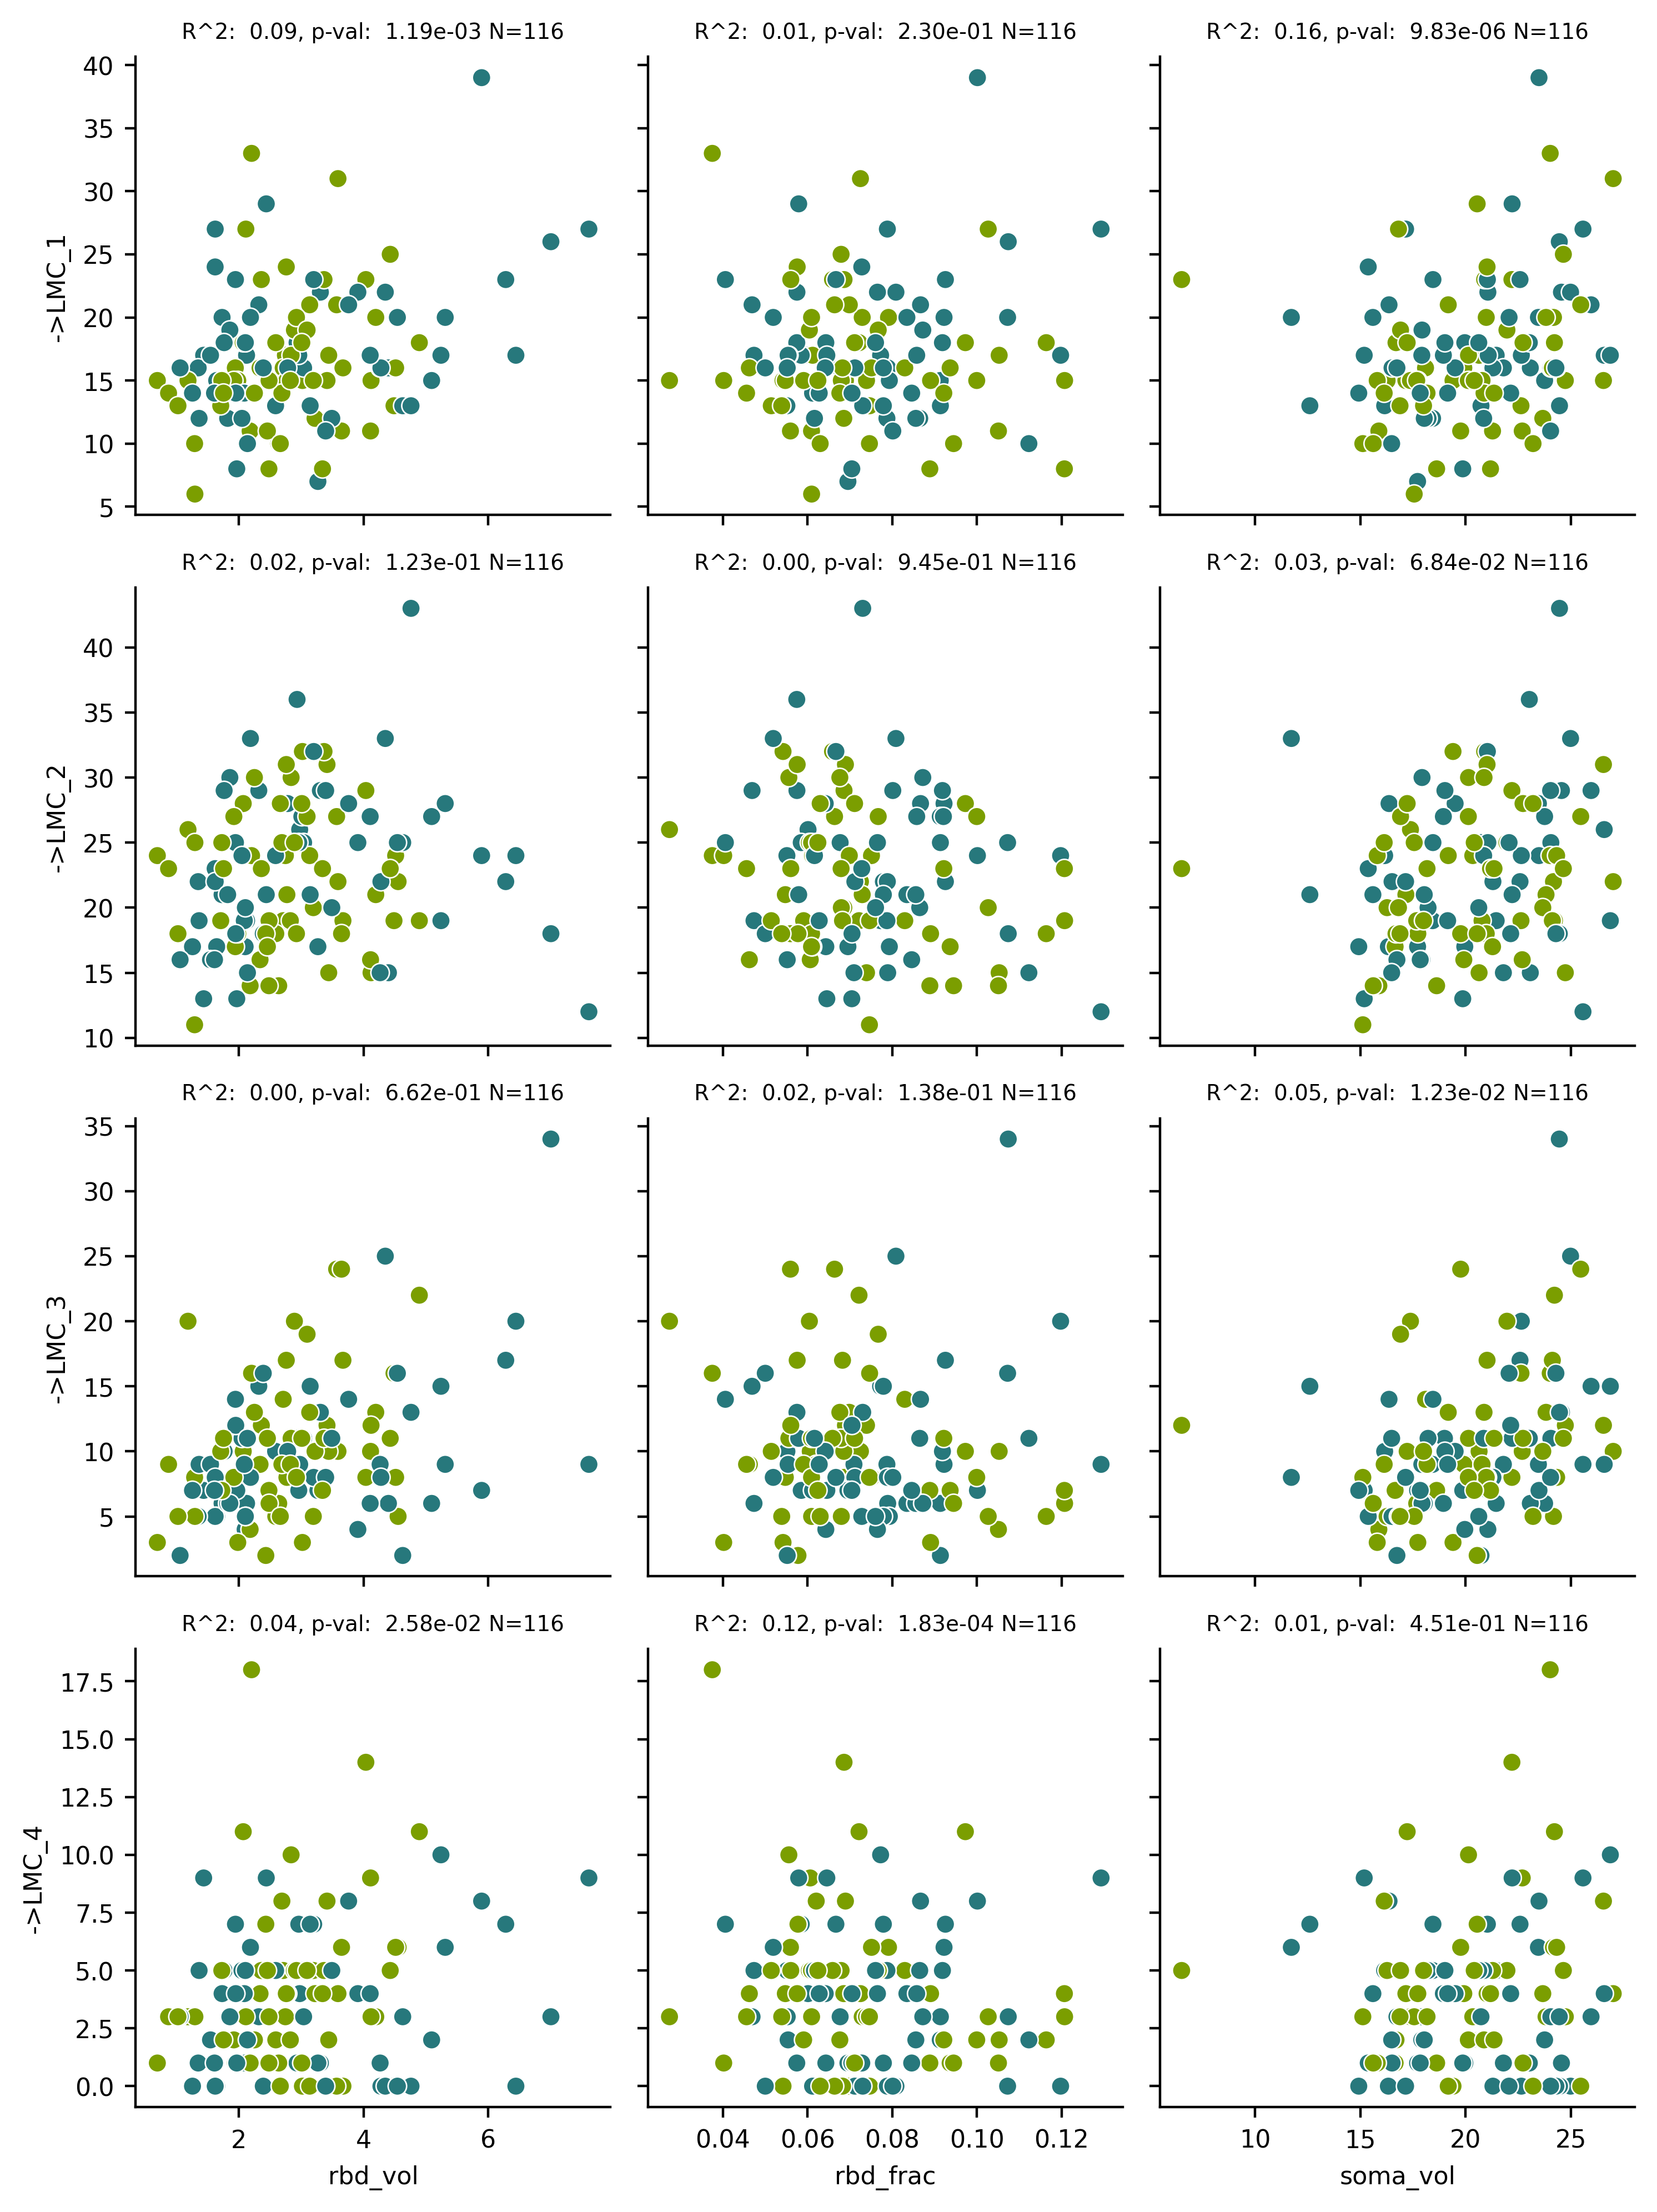

In [15]:
x_vars = ['rbd_vol', 'rbd_frac', 'soma_vol']
y_vars = ['->LMC_1', '->LMC_2', '->LMC_3', '->LMC_4']

incl_sts = ['R1', 'R4', 'R3', 'R6']

data = long[long.index.get_level_values(1).isin(incl_sts)].reset_index()

g = sns.PairGrid(data, x_vars=x_vars, y_vars=y_vars, hue='subtype', palette=st_cm)
g.map(sns.scatterplot)

i = 0
axes = g.axes.flatten()

res_table = pd.DataFrame(index=pd.MultiIndex.from_product([x_vars, y_vars]), columns=['R-squared', 'p-value'])

for this_x, this_y in itertools.product(x_vars, y_vars):
    X = sm.add_constant(data[this_x])
    Y = data[this_y]

    model = sm.OLS(Y, X)
    results = model.fit()
    res_table.loc[(this_x, this_y), 'R-squared'] = results.rsquared
    res_table.loc[(this_x, this_y), 'p-value'] = results.f_pvalue
    
    axes[i].set_title(f"R^2: {results.rsquared: .2f}, p-val: {results.f_pvalue: .2e} " +  
                      f"N={len(X)}", fontsize=7)
    i+=1

#g.add_legend()
plt.tight_layout()
plt.show()
#display(res_table)

if save_figs:
    g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outL1-4.svg')
    g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pr-scatter-rhvars-outL1-4.png')